In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("NFLX.csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,04-02-2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
dataset['Date']=pd.to_datetime(dataset.Date)

C:\Users\Karthik Ganesh\AppData\Local\Temp\ipykernel_4228\234459658.py:1: UserWarning: Parsing '13-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['Date']=pd.to_datetime(dataset.Date)
C:\Users\Karthik Ganesh\AppData\Local\Temp\ipykernel_4228\234459658.py:1: UserWarning: Parsing '14-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['Date']=pd.to_datetime(dataset.Date)
C:\Users\Karthik Ganesh\AppData\Local\Temp\ipykernel_4228\234459658.py:1: UserWarning: Parsing '15-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['Date']=pd.to_datetime(dataset.Date)
C:\Users\Karthik Ganesh\AppData\Local\Temp\ipykernel_4228\234459658.py:1: UserWarning: Parsing '16-02-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dataset['Date']=pd.to_datetim

In [6]:
dataset.shape

(1009, 7)

In [7]:
dataset.drop('Adj Close',axis=1, inplace=True)

In [8]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2018-05-02,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-06-02,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-07-02,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-08-02,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-09-02,253.850006,255.800003,236.110001,249.470001,16906900


In [9]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
 5   Volume  1009 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.4 KB


In [12]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


In [13]:
print(len(dataset))

1009


<AxesSubplot:>

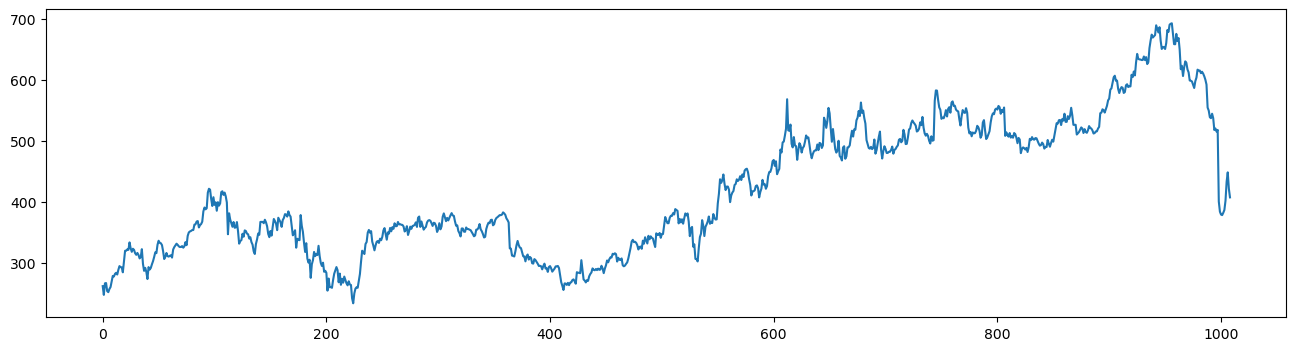

In [14]:
dataset['Open'].plot(figsize=(16,4))

In [15]:
X = dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test=train_test_split(X , y , random_state = 0)

In [17]:
X_train.shape

(756, 4)

In [18]:
X_test.shape

(253, 4)

In [19]:
y_train.shape

(756,)

In [20]:
y_test.shape

(253,)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [22]:
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
print(regressor.coef_)

[-5.98637669e-01  7.42752459e-01  8.57948723e-01  9.68159261e-08]


In [24]:
print(regressor.intercept_)

-0.707759556573194


In [25]:
predicted=regressor.predict(X_test)

In [26]:
print(X_test)

            Open        High         Low    Volume
801   557.000000  559.750000  550.299988   2720300
311   378.000000  383.500000  374.510010   5398200
85    368.540009  368.700012  357.799988   8278000
435   278.049988  285.750000  277.350006   6248400
204   260.549988  266.250000  253.800003  12498600
...          ...         ...         ...       ...
583   418.829987  426.720001  415.980011   3743700
200   283.790009  285.089996  269.149994  12993800
767   525.000000  548.539978  518.280029   4136500
1000  379.140015  387.709991  365.130005  15145800
385   298.859985  303.549988  296.269989   6905800

[253 rows x 4 columns]


In [27]:
predicted.shape

(253,)

In [28]:
dframe=pd.DataFrame(y_test,predicted)

In [29]:
dfr=pd.DataFrame({'Actual':y_test,'predicted':predicted})

In [30]:
print(dfr)

          Actual   predicted
801   553.729980  553.999288
311   379.059998  379.685786
85    361.399994  360.298634
435   281.859985  283.639587
204   261.429993  260.032497
...          ...         ...
583   425.920013  422.764132
200   270.600006  273.331047
767   546.150024  537.495050
1000  366.420013  375.026471
385   302.799988  300.698946

[253 rows x 2 columns]


In [31]:
dfr.head()

,Actual,predicted
801,553.729980,553.999288
311,379.059998,379.685786
85,361.399994,360.298634
435,281.859985,283.639587
204,261.429993,260.032497


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
regressor.score(X_test,y_test)

0.9982601041694183

In [34]:
import math

In [35]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 3.124088127382001


In [36]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 19.163612341865353


In [37]:
print('`Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

`Root Mean Squared Error: 4.377626336482518


In [38]:
graph=dfr.head(30)

<AxesSubplot:>

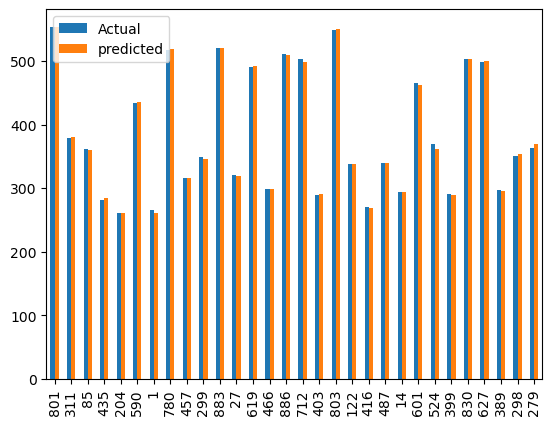

In [39]:
graph.plot(kind='bar')